## <font color = "purple"> Exploratory Data Analysis </font>

In [1]:
# Import libaries 
import pandas as pd
import os

In [2]:
# Read the data
os.listdir("data")
df = pd.ExcelFile("data/AGO STOCK MOVEMENT 2015.xlsx")
print(df.sheet_names)

# January data
jan = pd.read_excel(df, "JANUARY 2015", skiprows=5)
jan = jan[["DATE", "SALES"]]
jan = jan.iloc[0:32,:]
jan.tail()

['JANUARY 2015', 'FEBRUARY 2015', 'MARCH 2015', 'APRIL 2015', 'MAY 2015', 'JUNE 2015', 'JULY 2015', 'AUGUST 2015', 'SEPTEMBER 2015']


,DATE,SALES
27,2015-01-27,6870.83
28,2015-01-28,6042.06
29,2015-01-29,5947.24
30,2015-01-30,6324.38
31,2015-01-31,4880.65


In [3]:
# February data
feb = pd.read_excel(df, "FEBRUARY 2015", skiprows=5)
feb = feb[["DATE","SALES"]]
feb = feb.iloc[0:29,:]
feb.head()
# Concatinating the two
final= pd.concat([jan, feb])
final.shape

(61, 2)

In [18]:
# Using a for loop to concatenate the sheets
# Define the sheet names

file_path = "data/AGO STOCK MOVEMENT 2015.xlsx"
sheet_names = ['JANUARY 2015', 'FEBRUARY 2015', 'MARCH 2015', 'APRIL 2015', 'MAY 2015', 'JUNE 2015', 'JULY 2015', 'AUGUST 2015', 'SEPTEMBER 2015']# list to store the final dataframe

cleaned_data = []
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name, skiprows = 5)
    df = df[["DATE", "SALES"]].iloc[0:32,:]
    cleaned_data.append(df)
# concatenate dataframes
dt = pd.concat(cleaned_data)
print(dt)

                   DATE    SALES
0                   NaT      NaN
1   2015-01-01 00:00:00  3171.43
2   2015-01-02 00:00:00  3843.45
3   2015-01-03 00:00:00  3556.74
4   2015-01-04 00:00:00  3482.36
..                  ...      ...
27  2015-08-27 00:00:00      NaN
28  2015-08-28 00:00:00      NaN
29  2015-08-29 00:00:00      NaN
30  2015-08-30 00:00:00      NaN
31  2015-08-31 00:00:00      NaN

[288 rows x 2 columns]


In [20]:
# The column names
dt.columns

Index(['DATE', 'SALES'], dtype='object')

In [21]:
# Number of rows and columns
dt.shape

(288, 2)

In [36]:
# Summary statistics
dt["SALES"].describe()

count      252.00
unique     250.00
top       3843.45
freq         2.00
Name: SALES, dtype: float64

In [37]:
# Column types
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    277 non-null    object
 1   SALES   252 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [42]:
# Convert the date column to DateTime
dt["DATE"] = pd.to_datetime(dt["DATE"])
dt["DATE"].info()

<class 'pandas.core.series.Series'>
Int64Index: 288 entries, 0 to 31
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
277 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.5 KB


In [43]:
# Checking for nulls
dt.isnull().sum()
# Impute the nulls
dt_upd = dt.dropna()

In [44]:
dt_upd.shape

(252, 2)

## <font color = #b0793e>Visualization</font>

In [45]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='SALES'>

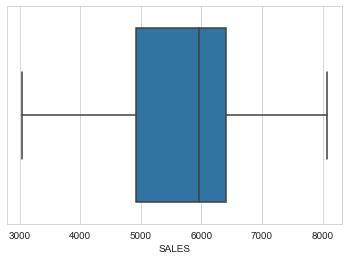

In [46]:
# Sales boxplot
sns.set_style("whitegrid")
sns.boxplot(x ="SALES", data = dt_upd)

* Most of the daily sales range from 5000 to 6500

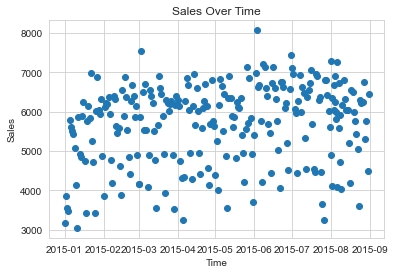

In [47]:
# Sales by month
plt.scatter(dt_upd["DATE"],dt_upd["SALES"])

plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Sales Over Time")
plt.show()